<a href="https://colab.research.google.com/github/GraLesl/MAT-421/blob/main/ModuleB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation Problem Statement
Often times, it is deisred to take a given data set of ($x$) values and ($y$) values, create a function which estimates additional, undefined points which correspond to the given values without creating a model. To accomplish this, various methods of interpolation have been developed.

# Linear Interpolation

One of the most basic form of interpolation assumes a line is drawn between the two nearest points in a data set and the new point is mapped to said line.

An equation for linear interpolation at a given point x is as follows: $\hat{y}(x)=y_{i}+\frac{(y_{i+1}-y_{i})(x-x_{i})}{(x_{i+1}-x_{i})}$

If we were to apply this to a new point ($x_{new}$) = 3.5 for a dataset of ($x$) = [0,1,2,3,4] and ($y$) = [2,1,4,3,6]: $y_{new}=3+\frac{(3)(0.5)}{(1)}=4.5$

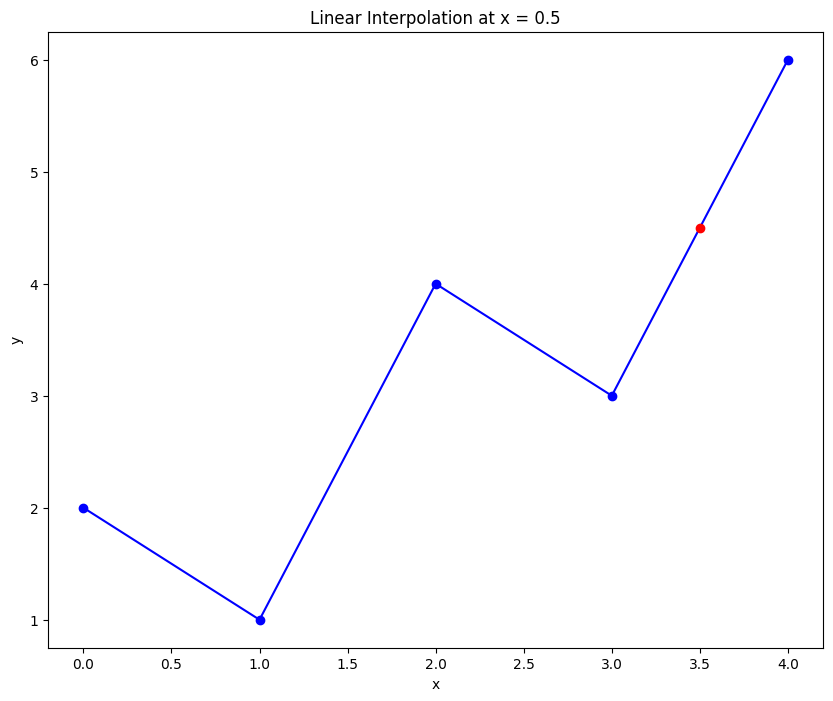

In [15]:
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import interpolate
import matplotlib.pyplot as plt

x = [0,1,2,3,4]
y = [2,1,4,3,6]

f = interp1d(x,y)
y_new = f(3.5)

plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(3.5, y_new, 'ro')
plt.title('Linear Interpolation at x = 3.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cubic Interpolation

To provide a smoother interpolation between points, peicewise cubic functions can replace the linear segments connecting each given point.

Each cubic segment can be characterized as such: $S_{i}(x)=a_{i}x^{3}+b_{i}x^{2}+c_{i}x +d_{i}$

Provided $n$ given data points, there will be $n-1$ equations to solve, therefore $4(n-1)$ equations are needed to find all the coefficients.

Each equation has two known points at its begining and end which brings the total number of needed equations down to $2(n-1)$. Next, each cubic segment should smoothly transition from one to the next, so the end of one segment and the begining of the next should each have the same derivative. This provides $2(n-2)$ more equations leaving only two left to solve. Finally, boundary conditions can be selected for each of the endpoints such as setting their second derivatives to zero, creating a straight line at each endpoint. Or their derivatives could be set to some arbitrary value.

All these equations are packaged inot the scipy.interpolate.CubicSpline script which is demonstrated below with clamped endpoints (derivatives set to zero).




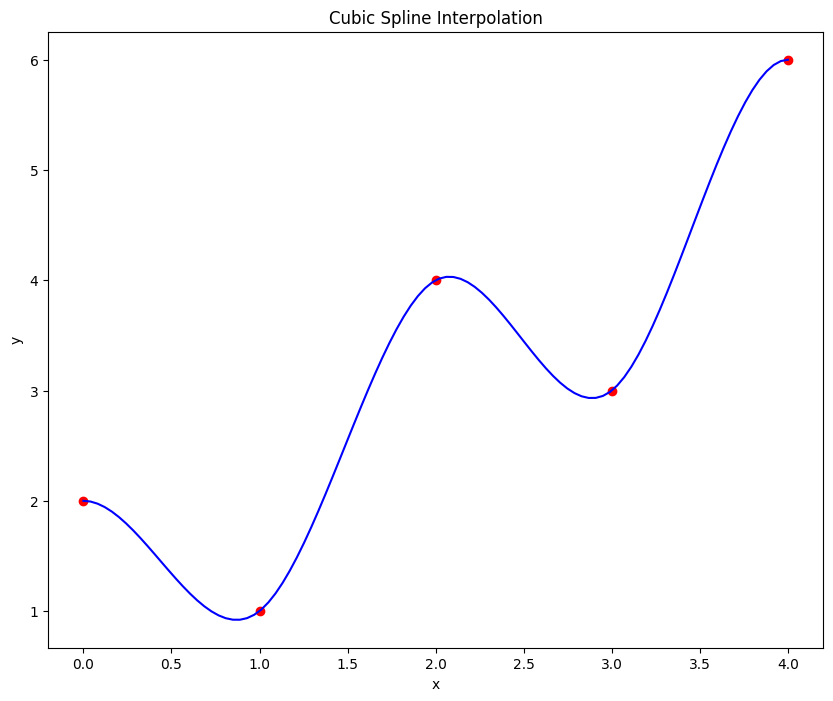

In [19]:
from scipy import interpolate
from scipy.interpolate import CubicSpline
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = [0,1,2,3,4]
y = [2,1,4,3,6]

f = CubicSpline(x,y,bc_type='clamped')
x_new = np.linspace(0,np.max(x),100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new, 'b')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()